**ĐỀ TÀI**: DỰ ĐOÁN GIÁ VÀNG TRONG 30 NGÀY TIẾP THEO BẰNG MÔ HÌNH HỒI QUY TUYẾN TÍNH (Linear Regression)

**Mục tiêu đề tài:** Xây dựng mô hình dự đoán giá vàng trong tương lai dựa trên cơ sở dữ liệu biến động giá trong quá khứ. Trực quan hóa xu hướng biến động giá vàng và so sánh giữa dữ liệu thực và dữ liệu dự đoán.

**Dữ liệu sử dụng:** Dữ liệu sử dụng mô phỏng gồm 100 ngày giá vàng liên tiếp từ ngày 01/01/2023, tạo bằng cách sinh ngẫu nhiên dao động quanh mức 1900 USD/ounce

**Công cụ/ Thư vện:** Python, Pandas, Numpy, Matplotlib, scikit-learn

**Mô Hình Sử Dụng:** Linear Regression ( Hồi quy tuyến tính )

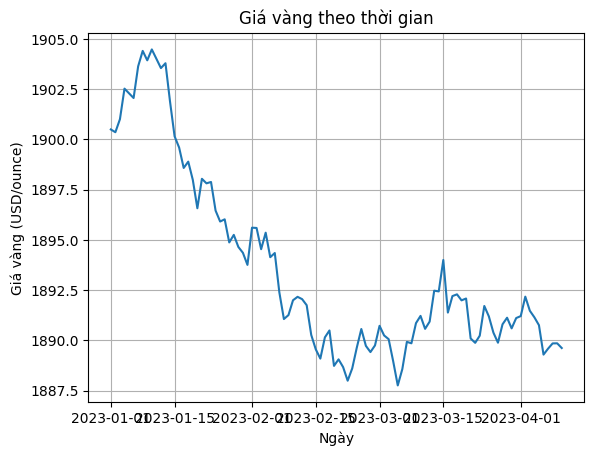

Mean Squared Error: 8.664495488586924


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


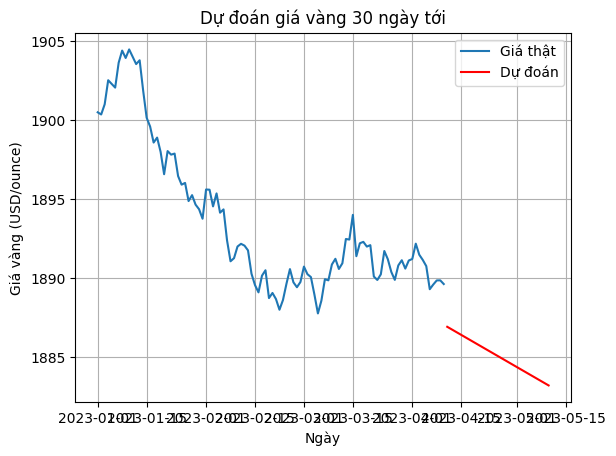

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dates = pd.date_range(start="2023-01-01", periods=100)
np.random.seed(42)
prices = np.cumsum(np.random.randn(100)) + 1900

df = pd.DataFrame({'Date': dates, 'Gold_Price': prices})
df['Date_Ordinal'] = df['Date'].map(pd.Timestamp.toordinal)
df.head()
plt.plot(df['Date'], df['Gold_Price'])
plt.title("Giá vàng theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Giá vàng (USD/ounce)")
plt.grid(True)
plt.show()
X = df[['Date_Ordinal']]
y = df['Gold_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
future_dates = pd.date_range(start="2023-04-11", periods=30)
future_ordinals = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_predictions = model.predict(future_ordinals)

plt.plot(df['Date'], df['Gold_Price'], label='Giá thật')
plt.plot(future_dates, future_predictions, label='Dự đoán', color='red')
plt.legend()
plt.title("Dự đoán giá vàng 30 ngày tới")
plt.xlabel("Ngày")
plt.ylabel("Giá vàng (USD/ounce)")
plt.grid(True)
plt.show()

# Đoạn code trên thuộc nhóm Supervised Learning (Học có giám sát) vì ta có cặp (input, output): ngày (input) → giá vàng (output).
Date_Ordinal là biến đặc trưng, còn Gold_Price là nhãn/label.
Biến đầu vào (Input) và đầu ra (Output)

attribute/feature: đặc trưng (ví dụ: diện tích, số phòng…)
label/output: biến mục tiêu cần dự đoán
Input và Ouput trong đoạn code:
 -Input: ngày dưới dạng số nguyên
 - Output: giá vàng
X = df[['Date_Ordinal']]  
y = df['Gold_Price']      
Date_Ordinal là biến đặc trưng, còn Gold_Price là nhãn/label.
Supervised Learning (Học có giám sát): Dữ liệu có label/output để mô hình học từ đó.
Unsupervised Learning (Học không giám sát): Dữ liệu không có label, mô hình tự tìm ra cấu trúc ẩn.

# Huấn luyện mô hình (Training)
Lý thuyết:
Input model → Output
Y = aX + b: mô hình hồi quy tuyến tính đơn giản

Trong code:
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán (Prediction) và kiểm thử (Testing)
Lý thuyết
Test = dữ liệu mới → đưa vào mô hình → dự đoán Y
test input đi vào mô hình để nhận dự đoán đầu ra

Trong code:
y_pred = model.predict(X_test)  
future_predictions = model.predict(future_ordinals)
- dự đoán từ tập test, có thể dự đoán tương lai.

# Đánh giá mô hình (Evaluation)
Lý thuyết:
Các hàm sai số được viết như:
MAE: mean absolute error
MSE: mean squared error (có công thức: (y - ŷ)^2)

Trong code:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
- sử dụng MSE

# Trực quan hóa dữ liệu (Visualization)

Biến động giá thật theo thời gian
Dự đoán 30 ngày tiếp theo
Điều này hỗ trợ rất tốt cho việc trực quan hóa và đánh giá mô hình.

# Một vài điểm bonus liên hệ trực tiếp bảng viết tay:
Example/Sample: mỗi dòng dữ liệu trong DataFrame (ngày và giá) là một sample.
Training set vs Test set: chia theo chuẩn train_test_split.


1. Import thư viện

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
Nhiệm vụ:
pandas, numpy: thao tác dữ liệu
matplotlib: vẽ biểu đồ
scikit-learn: huấn luyện mô hình hồi quy tuyến tính và đánh giá

2. Tạo dữ liệu mô phỏng
dates = pd.date_range(start="2023-01-01", periods=100)
np.random.seed(42)
prices = np.cumsum(np.random.randn(100)) + 1900

Tạo 100 ngày bắt đầu từ 2023-01-01
Sinh ngẫu nhiên giá vàng dao động xung quanh 1900 USD bằng np.random.randn() và cộng dồn (cumsum)

3. Tạo DataFrame chứa dữ liệu
df = pd.DataFrame({'Date': dates, 'Gold_Price': prices})
df['Date_Ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

Tạo bảng df chứa ngày và giá vàng
Chuyển cột ngày sang dạng số nguyên (Date_Ordinal) để mô hình có thể xử lý

4. Vẽ biểu đồ giá vàng theo thời gian
plt.plot(df['Date'], df['Gold_Price'])
plt.title("Giá vàng theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Giá vàng (USD/ounce)")
plt.grid(True)
plt.show()

Vẽ đường biểu diễn biến động giá vàng theo thời gian

5. Chuẩn bị dữ liệu để huấn luyện mô hình
X = df[['Date_Ordinal']]
y = df['Gold_Price']

X: đặc trưng (ngày dạng số)
y: mục tiêu (giá vàng)

6. Tách dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Chia dữ liệu thành 80% huấn luyện và 20% kiểm tra

7. Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

Tạo mô hình hồi quy tuyến tính và huấn luyện nó với dữ liệu

8. Dự đoán và đánh giá mô hình

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Dự đoán giá vàng từ dữ liệu test
Tính lỗi bình phương trung bình (MSE) để đánh giá độ chính xác

9. Dự đoán 30 ngày tới
future_dates = pd.date_range(start="2023-04-11", periods=30)
future_ordinals = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_predictions = model.predict(future_ordinals)

Tạo 30 ngày tiếp theo (từ sau 100 ngày ban đầu)
Chuyển đổi sang dạng số
Dự đoán giá vàng tương ứng

LÝ THUYẾT HỌC MÁY
**Học máy là gì?**
Học máy là lĩnh vực nghiên cứu cho phép máy tính học từ dữ liệu, và cải thiện hiệu suất của mình mà không cần lập trình rõ ràng từng bước.
Ví dụ: Thay vì viết mã để phân loại email rác, bạn cung cấp nhiều email rác và không rác, rồi máy sẽ tự học mô hình để phân loại.

**Các loại học máy** có 3 loại học máy
- Học có giám sát (Supervised Learning):
* Dữ liệu đầu vào có nhãn (label): Ví dụ, hình ảnh mèo có gắn nhãn “mèo”.
* Mục tiêu: Học một hàm ánh xạ từ input → output.
* Ứng dụng: Dự đoán giá nhà, phân loại email, nhận dạng chữ viết tay.
+Thuật toán tiêu biểu:
* Hồi quy tuyến tính (Linear Regression)
* Cây quyết định (Decision Tree)
* KNN (K-Nearest Neighbors)
* SVM (Support Vector Machine)
* Mạng nơ-ron (Neural Network)

- Học không giám sát (Unsupervised Learning):
* Dữ liệu không có nhãn.
* Mục tiêu: Tìm ra cấu trúc ẩn trong dữ liệu.
Ứng dụng: Phân nhóm khách hàng, giảm chiều dữ liệu, phát hiện bất thường.
+ Thuật toán tiêu biểu:
* Phân cụm K-Means
* Hierarchical Clustering
* PCA (Phân tích thành phần chính)

- Học tăng cường (Reinforcement Learning):
* Học qua thử - sai.
* Agent tương tác với môi trường, nhận phần thưởng (reward) hoặc phạt để học hành vi tối ưu.
Ứng dụng: Robot học cách di chuyển, AI chơi game, xe tự lái.

**Các khái niệm quan trọng**
* Tập huấn luyện (Training Set): Dữ liệu để máy học mô hình.
* Tập kiểm tra (Test Set): Dữ liệu dùng để đánh giá mô hình sau khi học.
* Overfitting: Mô hình học quá “kỹ” đến mức nhớ dữ liệu huấn luyện, không tổng quát tốt.
* Underfitting: Mô hình quá đơn giản, không nắm được mối quan hệ trong dữ liệu.

**Quy trình học máy cơ bản**
1. Thu thập dữ liệu
2. Tiền xử lý dữ liệu
3. Chọn thuật toán
4. Huấn luyện mô hình
5. Đánh giá mô hình
6. Dự đoán / Ứng dụng